# Проведение расчётов и исследований

In [1]:
import pandas as pd
from dython.nominal import associations
import matplotlib.pyplot as plt
import seaborn as sns

### Базовая подготовка датасета к проведению рассчетов

In [2]:
column_names = [
    'year',  # Год
    'season',  # Время года
    'climate',  # Климат
    'city',  # Город
    'country',  # Страна
    'cooling_method',  # Способ охлаждения
    'mixed_cooling_mode',  # Режим при смешанном типе охлаждения
    'heating_method',  # Способ обогрева
    'age',  # Возраст
    'gender',  # Пол
    'temperature_feeling',  # Ощущение температуры
    'temperature_feeling_bool',  # Ощущение температуры (bool)
    'preferred_temperature_change',  # Предпочтительное изменение температуры
    'air_movement_feeling_bool',  # Ощущение движения воздуха (bool)
    'preferred_air_movement_change',  # Предпочтительное изменение движения воздуха
    'comfort_rating',  # Оценка комфорта
    'clothing_insulation',  # Утепление
    'indoor_air_temperature',  # Температура воздуха в помещении
    'outdoor_air_temperature',  # Температура воздуха на улице
    'relative_humidity',  # Относительная влажность (RH)
    'air_speed',  # Скорость воздуха
    'height',  # Рост
    'weight',  # Вес
    'curtains',  # Занавески
    'fan_mode',  # Вентилятор
    'window_status',  # Окно
    'door_status',  # Двери
    'heating_mode',  # Отопление
    'average_monthly_outdoor_temperature',  # Среднемесячная температура на улице
    'number_of_complaints'  # Количество рекламаций
]

column_types = {
    'year': 'int',  # Год (целое число)
    'season': 'category',  # Время года (категориальная переменная: весна, лето и т.д.)
    'climate': 'category',  # Климат (категориальная переменная: названия типов климата)
    'city': 'category',  # Город (категориальная переменная)
    'country': 'category',  # Страна (категориальная переменная)
    'cooling_method': 'category',  # Способ охлаждения (категориальная переменная)
    'mixed_cooling_mode': 'category',  # Режим при смешанном типе охлаждения (категориальная переменная)
    'heating_method': 'category',  # Способ обогрева (категориальная переменная)
    'age': 'int',  # Возраст (целое число)
    'gender': 'category',  # Пол (категориальная переменная: мужской/женский)
    'temperature_feeling': 'float',  # Ощущение температуры (целое число от -3 до +3)
    'temperature_feeling_bool': 'bool',  # Ощущение температуры (bool)
    'preferred_temperature_change': 'category',  # Предпочтительное изменение температуры (категориальная переменная)
    'air_movement_feeling_bool': 'bool',  # Ощущение движения воздуха (bool)
    'preferred_air_movement_change': 'category',  # Предпочтительное изменение движения воздуха (категориальная переменная)
    'comfort_rating': 'int',  # Оценка комфорта (целое число от 1 до 6)
    'clothing_insulation': 'float',  # Утепление (вещественное число, связанный с одеждой фактор)
    'indoor_air_temperature': 'float',  # Температура воздуха в помещении (вещественное число)
    'outdoor_air_temperature': 'float',  # Температура воздуха на улице (вещественное число)
    'relative_humidity': 'float',  # Относительная влажность (вещественное число)
    'air_speed': 'float',  # Скорость воздуха (вещественное число)
    'height': 'float',  # Рост (вещественное число)
    'weight': 'float',  # Вес (вещественное число)
    'curtains': 'bool',  # Занавески (категориальная переменная: 0 или 1)
    'fan_mode': 'bool',  # Вентилятор (категориальная переменная: 0 или 1)
    'window_status': 'bool',  # Окно (категориальная переменная: 0 или 1)
    'door_status': 'bool',  # Двери (категориальная переменная: 0 или 1)
    'heating_mode': 'bool',  # Отопление (категориальная переменная: 0 или 1)
    'average_monthly_outdoor_temperature': 'float',  # Среднемесячная температура на улице (вещественное число)
    'number_of_complaints': 'int'  # Количество рекламаций (целое число)
}

In [3]:
df = pd.read_csv(
    'data/cleared_data.csv',
    # sep=';',
    # decimal='.',
    # header=0,
    # names=column_names
)

df.head()


,Unnamed: 0,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,...,air_speed,height,weight,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints
0,0,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,22,...,0.26,NaN,NaN,закрыто,включен,нет данных,нет данных,нет данных,28.9,0
1,2,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,42,...,0.08,NaN,NaN,открыто,выключен,нет данных,нет данных,нет данных,32.8,0
2,5,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,27,...,0.21,NaN,NaN,закрыто,включен,нет данных,нет данных,нет данных,28.9,0
3,6,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,32,...,0.10,NaN,NaN,закрыто,включен,нет данных,нет данных,нет данных,32.8,0
4,8,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,43,...,0.15,NaN,NaN,закрыто,включен,нет данных,нет данных,нет данных,32.8,0


In [4]:
df.shape

(450, 31)

In [5]:
df.isna().sum()

Unnamed: 0                               0
year                                     0
season                                   0
climate                                  0
city                                     0
country                                  0
cooling_method                           0
mixed_cooling_mode                       0
heating_method                           0
age                                      0
gender                                   0
temperature_feeling                      0
temperature_feeling_bool                 0
preferred_temperature_change             0
air_movement_feeling_bool              253
preferred_air_movement_change            0
comfort_rating                         268
clothing_insulation                      0
indoor_air_temperature                   0
outdoor_air_temperature                406
relative_humidity                        0
air_speed                                0
height                                 312
weight     

In [6]:
df.dtypes

Unnamed: 0                               int64
year                                     int64
season                                  object
climate                                 object
city                                    object
country                                 object
cooling_method                          object
mixed_cooling_mode                      object
heating_method                          object
age                                      int64
gender                                  object
temperature_feeling                    float64
temperature_feeling_bool                object
preferred_temperature_change            object
air_movement_feeling_bool               object
preferred_air_movement_change           object
comfort_rating                         float64
clothing_insulation                      int64
indoor_air_temperature                 float64
outdoor_air_temperature                float64
relative_humidity                      float64
air_speed    

In [7]:
# df = pd.read_csv(
#     'data/data.csv',
#     sep=';',
#     decimal='.',
#     header=0,
#     names=column_names
# )

# df.to_csv('data/norm_data.csv', index=False)

# df = df.drop(['height', 'weight'], axis=1)

# df['cooling_method'].fillna("NA")
# df['mixed_cooling_mode'].fillna("NA")
# df['heating_method'].fillna("NA")

# df['comfort_rating'].fillna(3)

# for column in df.columns:
#     mode_value = df[column].mode()[0] if not df[column].mode().empty else None
#     df[column] = df[column].fillna(mode_value)

df = df.astype(column_types, errors='ignore')

# df = df.drop_duplicates(keep='first')

# df.head()

In [8]:
df.dtypes

Unnamed: 0                                int64
year                                      int64
season                                 category
climate                                category
city                                   category
country                                category
cooling_method                         category
mixed_cooling_mode                     category
heating_method                         category
age                                       int64
gender                                 category
temperature_feeling                     float64
temperature_feeling_bool                   bool
preferred_temperature_change           category
air_movement_feeling_bool                  bool
preferred_air_movement_change          category
comfort_rating                          float64
clothing_insulation                     float64
indoor_air_temperature                  float64
outdoor_air_temperature                 float64
relative_humidity                       

### Рассчеты

In [9]:
df.head()

,Unnamed: 0,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,...,air_speed,height,weight,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints
0,0,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,22,...,0.26,NaN,NaN,True,True,True,True,True,28.9,0
1,2,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,42,...,0.08,NaN,NaN,True,True,True,True,True,32.8,0
2,5,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,27,...,0.21,NaN,NaN,True,True,True,True,True,28.9,0
3,6,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,32,...,0.10,NaN,NaN,True,True,True,True,True,32.8,0
4,8,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,43,...,0.15,NaN,NaN,True,True,True,True,True,32.8,0


Создать дополнительный категориальный столбец, который покажет количество рекламаций по каждому клиенту отдельно: мало (≤1), средне (=2), много (>2).

In [10]:
df['complaints_cat'] = ['few' if x <= 1 else 'medium' if x == 2 else "many" for x in df['number_of_complaints']]
df['complaints_cat'] = df['complaints_cat'].astype('category')

df[['number_of_complaints', 'complaints_cat']].sample(5)

,number_of_complaints,complaints_cat
310,0,few
388,0,few
120,0,few
314,0,few
393,0,few


Рассчитать средний возраст респондентов по полу и стране

In [11]:
tmp = df[['gender', 'age', 'country']].copy()
mean_age_df = tmp.groupby(['gender', 'country'], observed=False).mean().copy()

mean_age_df.rename(columns={
    'age': 'age_mean',
}, inplace=True)

mean_age_df.to_csv('data/mean_age.csv')

mean_age_df

age_mean
gender  country             
Unknown Австралия        NaN
        Индия            NaN
        США        35.681818
Женский Австралия  46.250000
        Индия      39.848485
        США              NaN
Мужской Австралия  42.614679
        Индия      40.454545
        США              NaN

In [12]:
df.query('gender == "Женский" and country == "США"') # ?

,Unnamed: 0,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,...,height,weight,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints,complaints_cat


Добавить категориальный столбец, разделив респондентов на три категории по возрасту: до 44 лет - молодой возраст, 45 - 59 лет - средний возраст, 60 лет и больше - пожилой возраст.

In [13]:
df['age_cat'] = ['young_age' if x <= 44 else 'mean_age' if 45 <= x <= 59 else "old_age" for x in df['age']]
df['age_cat'] = df['age_cat'].astype('category')

df[['age', 'age_cat']].sample(5)

,age,age_cat
60,45,mean_age
273,25,young_age
85,65,old_age
339,55,mean_age
416,55,mean_age


Рассчитать среднюю комфортную температуру в зависимости от возрастной категории

In [14]:
tmp = df[['temperature_feeling_bool', 'age_cat', 'indoor_air_temperature', 'outdoor_air_temperature']].copy()
avarage_comf_temp_df = tmp.groupby(['temperature_feeling_bool', 'age_cat'], observed=False).mean()

avarage_comf_temp_df.rename(columns={
    'indoor_air_temperature': 'indoor_air_temperature_mean',
    'outdoor_air_temperature': 'outdoor_air_temperature_mean',
}, inplace=True)

avarage_comf_temp_df.to_csv('data/avarage_comf_temp.csv')

avarage_comf_temp_df

indoor_air_temperature_mean  \
temperature_feeling_bool age_cat                                  
True                     mean_age                      25.38800   
                         old_age                       25.22500   
                         young_age                     24.68883   

                                    outdoor_air_temperature_mean  
temperature_feeling_bool age_cat                                  
True                     mean_age                      23.883333  
                         old_age                             NaN  
                         young_age                     24.113158

Рассчитать медианное значение температуры и влажности для каждого типа охлаждения

In [15]:
tmp = df[['cooling_method', 'indoor_air_temperature', 'outdoor_air_temperature', 'relative_humidity']].copy()
median_temp_df = tmp.groupby(['cooling_method'], observed=False).median()

median_temp_df.rename(columns={
    'indoor_air_temperature': 'indoor_air_temperature_median',
    'outdoor_air_temperature': 'outdoor_air_temperature_median',
    'relative_humidity': 'relative_humidity_median'
}, inplace=True)

median_temp_df.to_csv("data/median_temp.csv")

median_temp_df

,indoor_air_temperature_median,outdoor_air_temperature_median,relative_humidity_median
cooling_method,,,
Вентиляция,25.70,NaN,46.3
Кондиционирование,24.35,24.0,43.7
Смешанный,24.70,NaN,56.5


Добавить столбец с процентом удовлетворенных респондентов температурой воздуха в помещении относительно всех респондентов одной страны и одного пола

In [16]:
df['satisfaction_percentage'] = (
    df.groupby(['country', 'gender'], observed=False)['temperature_feeling_bool']
      .transform(lambda x: (x.mean() * 100).round(2))
)

df[['country', 'gender', 'temperature_feeling_bool', 'satisfaction_percentage']].sample(5)

,country,gender,temperature_feeling_bool,satisfaction_percentage
154,Австралия,Мужской,True,100.0
423,Индия,Мужской,True,100.0
412,Индия,Мужской,True,100.0
323,Индия,Мужской,True,100.0
211,Австралия,Мужской,True,100.0


Составить сводную таблицу, в которой данные будут сгруппированы по стране, полу, возрастной группе и подсчитаны средняя температура воздуха в помещении, на улице и средняя относительная влажность для каждой из этих групп.

In [17]:
tmp = df[['country', 'gender', 'age_cat', 'indoor_air_temperature', 'outdoor_air_temperature', 'relative_humidity']].copy()

summary_df = tmp.groupby(['country', 'gender', 'age_cat'], observed=False).mean()

summary_df.rename(columns={
    'indoor_air_temperature': 'avg_indoor_temp',
    'outdoor_air_temperature': 'avg_outdoor_temp',
    'relative_humidity': 'avg_relative_humidity'
}, inplace=True)

summary_df.to_csv("data/summary.csv")

summary_df

avg_indoor_temp  avg_outdoor_temp  \
country   gender  age_cat                                        
Австралия Unknown mean_age               NaN               NaN   
                  old_age                NaN               NaN   
                  young_age              NaN               NaN   
          Женский mean_age         24.100000               NaN   
                  old_age          24.900000               NaN   
                  young_age        23.840000               NaN   
          Мужской mean_age         24.044262               NaN   
                  old_age          24.733333               NaN   
                  young_age        24.146667               NaN   
Индия     Unknown mean_age               NaN               NaN   
                  old_age                NaN               NaN   
                  young_age              NaN               NaN   
          Женский mean_age         26.251282               NaN   
                  old_age                NaN               NaN   
                  young_age        26.374074               NaN   
          Мужской mean_age         26.817978               NaN   
                  old_age          29.300000               NaN   
                  young_age        24.962264               NaN   
США       Unknown mean_age         24.033333         23.883333   
                  old_age                NaN               NaN   
                  young_age        24.310526         24.113158   
          Женский mean_age               NaN               NaN   
                  old_age                NaN               NaN   
                  young_age              NaN               NaN   
          Мужской mean_age               NaN               NaN   
                  old_age                NaN               NaN   
                  young_age              NaN               NaN   

                             avg_relative_humidity  
country   gender  age_cat                           
Австралия Unknown mean_age                     NaN  
                  old_age                      NaN  
                  young_age                    NaN  
          Женский mean_age               61.370909  
                  old_age                44.550000  
                  young_age              61.368000  
          Мужской mean_age               61.680328  
                  old_age                64.366667  
                  young_age              61.668889  
Индия     Unknown mean_age                     NaN  
                  old_age                      NaN  
                  young_age                    NaN  
          Женский mean_age               47.620513  
                  old_age                      NaN  
                  young_age              52.851852  
          Мужской mean_age               48.796629  
                  old_age                78.800000  
                  young_age              52.788679  
США       Unknown mean_age               39.433333  
                  old_age                      NaN  
                  young_age              38.594737  
          Женский mean_age                     NaN  
                  old_age                      NaN  
                  young_age                    NaN  
          Мужской mean_age                     NaN  
                  old_age                      NaN  
                  young_age                    NaN

Самостоятельно найти информацию по стандартной комфортной относительной влажности в помещениях (в нашем случае - офисы). Создать новый категориальный столбец, в котором будет показано, удовлетворяет ли зафиксированная относительная влажность стандарту или нет. Категории назначить самостоятельно.

https://airwet.ru/tpost/xogv3ijut1-norma-vlazhnosti-vozduha-v-ofise-dlya-ko

На основе этих данных можно определить следующие категории:

"Комфортная" : влажность в пределах 40–60% .
"Низкая" : влажность ниже 40% .
"Высокая" : влажность выше 60% .

In [18]:
def categorize_humidity(humidity):
    if 40 <= humidity <= 60:
        return 'Комфортная'
    elif humidity < 40:
        return 'Низкая'
    else:
        return 'Высокая'
    
df['humidity_category'] = df['relative_humidity'].apply(categorize_humidity).astype("category")

df[['relative_humidity', 'humidity_category']].sample(5)

,relative_humidity,humidity_category
10,43.8,Комфортная
140,55.6,Комфортная
257,60.3,Высокая
44,56.1,Комфортная
404,32.0,Низкая


In [19]:
df.to_csv("data/researched_data.csv")

Исследовать корреляцию между параметрами. Объяснить наиболее коррелирующие параметры, имеет ли это реальный смысл или просто особенность данных?

In [20]:
cat_cols = df.columns[(df.dtypes == "category") | (df.dtypes == "bool")].to_list()

In [1]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} уникальных значений")


NameError: name 'df' is not defined

<Figure size 3000x2500 with 0 Axes>

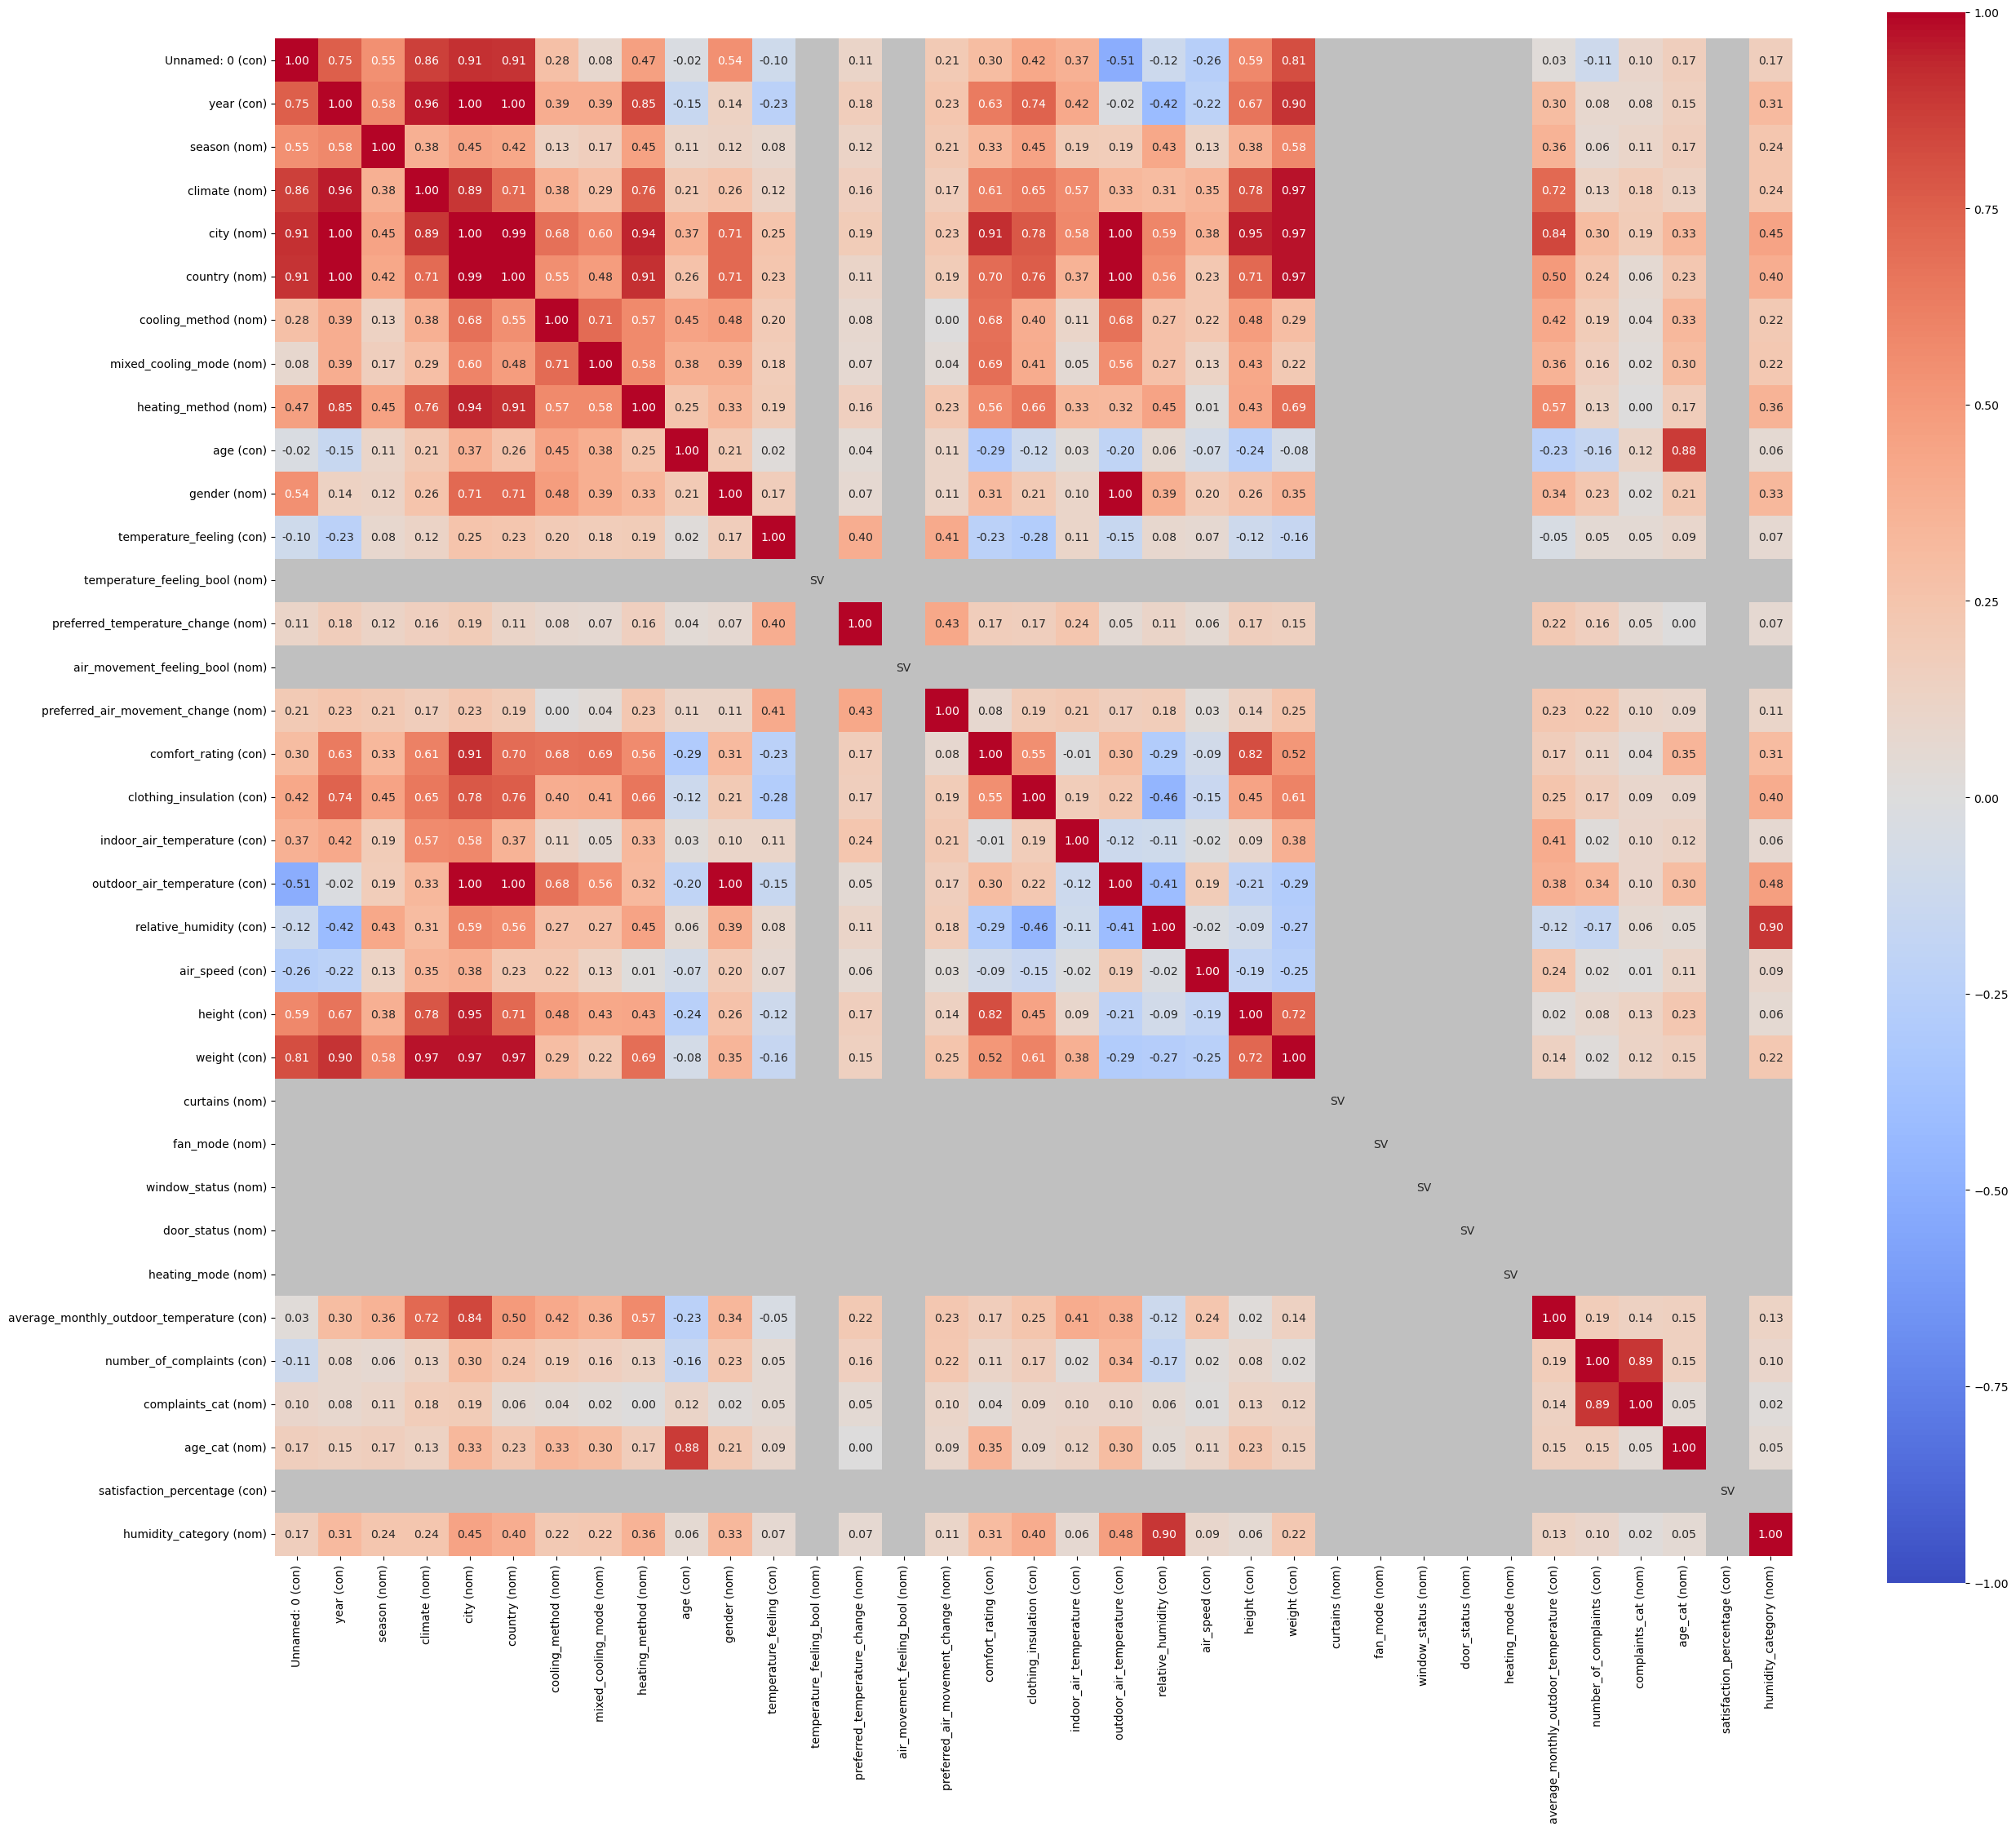

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(30, 25))
assoc_plot = associations(
    df,
    nominal_columns=cat_cols,
    mark_columns=True,
    num_num_assoc='spearman',
    nom_nom_assoc='cramer',
    nom_num_assoc='correlation_ratio',
    figsize=(30, 25),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True
)

plt.tight_layout()

plt.show()

По шкале Чеддока:
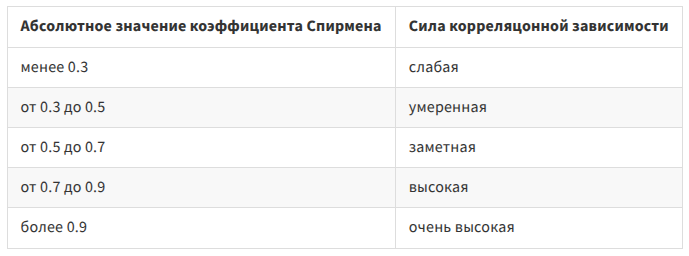

Корреляции с comfort_rating:
- year (заметная) - возможно со временем условия в офисе меняются, поэтому оценка коррелирует с годом
- climate (заметная) - оценка зависит от климата, вполне логично
- city/country (очень высокая, высокая) - скорее всего в разных городах/странах разная температура и разные возможности для контроля температуры в офисах, поэтому так
- cooling_method, mixed_cooling_mode, heating_method (заметная) - логично, от контроля температуры зависит комфорт, всё сходится
- height, weight (высокая, заметная) - возможно от роста и веса зависит восприятие температуры, а возможно просто особенность данных
- clothing_insulation (заметная) - оценка зависит от одежды, вполне логично
- fan_mode (заметная) - обычно вентилятор влияет на кофморт, всё логично

Интересные корреляции с indoor_temperature (понадобится для построения регрессионной модели):
- year, season, country, climate, city (заметная)
- cooling_method, mixed_cooling_mode, heating_method (слабое, слабое, умеренное) - почему-то довольно слабенько